# Project Outline - Data Eagles

By David Chester, Dorothy Monneh, Aidan, Joshua J, Jonathan Leonidas

## What is the Project Focus and Dataset of the project?
- The Project Focus is exploring Student Mental Health and how it affects students. 
- The Dataset is a survey collection from students attending the International Islamic University of Malaysia in the year of 2020. The reason we chose this as it was the best information we could find on mental health with the realistic goal of understanding the data in two weeks.
## Project Title ideas.
- Your out of "It is what it is."
- Are you okay?
- 
## Data Visualization
- Top Majors that suffer from depression
- Explanation of some majors
- Male & Female Comparison
- Numbers for those seeking treatment
- 
## Hypothesys
- Students that major in science or technical majors are more like to suffer from depression and or anxiety.
- Students are less likey to seek treatment based on cultural views in Malaysia.

## Prediction

https://www.kaggle.com/datasets/shariful07/student-mental-health?resource=download

The Data collected from International Islamic University Malaysia

In [3]:
# Import Numpy and Datascience modules.
import math
import numpy as np
import pandas as pd
from datascience import *

# Plotting modules
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', UserWarning)
# Fix for datascience collections Iterable
import collections as collections
import collections.abc as abc
collections.Iterable = abc.Iterable

## Data Visualization

#### Functions for project

In [4]:
def relabel(table,column,search,replace):
    for i in range(len(table.column(column))):
        if search.lower() == table.column(column)[i].lower():
            table.column(column)[i] = replace
        else:
            pass

### The Dataset

In [5]:
datafile = "Student Mental health.csv"
students = Table.read_table(datafile)
students = students.relabeled(["Choose your gender","What is your course?","Your current year of Study","What is your CGPA?","Marital status","Do you have Depression?","Do you have Anxiety?","Do you have Panic attack?","Did you seek any specialist for a treatment?"], ["Gender","Major","Year","GPA","Married","Depression","Anxiety",
"Panic Attacks","Treatment"]
)
students_nan_age = students.where("Age",are.above(0))
relabel(students,"Major","Engine","Engineering")
relabel(students,"Major","Engin","Engineering")
relabel(students,"Major","psychology","Psychology")
relabel(students,"Major","BCS","Computer Science")
relabel(students,"Major","BIT","Business Information Technology")
relabel(students,"Major","IT","Information Technology")
relabel(students,"Major","Fiqh","Islamic Law")
relabel(students,"Major","koe","Koe")
## relabel(students,"GPA","0 - 1.99","1")
## relabel(students,"GPA","2.00 - 2.49","2")
## relabel(students,"GPA","2.50 - 2.99","3")
students.sort("Timestamp")

Timestamp,Gender,Age,Major,Year,GPA,Married,Depression,Anxiety,Panic Attacks,Treatment
13/07/2020 10:07:32,Female,19,Biotechnology,Year 3,0 - 1.99,No,No,No,No,No
13/07/2020 10:10:30,Female,18,Engineering,year 4,3.50 - 4.00,No,No,No,No,No
13/07/2020 10:11:26,Female,24,Communication,Year 2,3.50 - 4.00,Yes,Yes,Yes,Yes,No
13/07/2020 10:12:18,Female,24,Diploma Nursing,year 2,3.50 - 4.00,No,No,No,No,No
13/07/2020 10:12:26,Female,19,Engineering,year 1,3.00 - 3.49,No,Yes,Yes,No,No
13/07/2020 10:12:28,Female,19,Pendidikan Islam,Year 2,3.00 - 3.49,No,No,No,No,No
13/07/2020 10:14:46,Male,23,Radiography,year 1,3.00 - 3.49,No,No,No,No,No
13/07/2020 10:33:47,Female,18,Psychology,year 1,3.50 - 4.00,No,Yes,Yes,No,Yes
13/07/2020 10:34:08,Female,19,Fiqh fatwa,Year 3,3.00 - 3.49,No,No,No,No,No
13/07/2020 11:46:13,Female,18,Psychology,year 1,3.50 - 4.00,No,Yes,Yes,Yes,No


#### Student Age Numbers

These values how the number values of all students based off age

In [6]:
student_min_age = min(students_nan_age.column("Age"))
print("The minimum age of all students is " + str(student_min_age))

The minimum age of all students is 18.0


In [7]:
student_max_age = max(students_nan_age.column("Age"))
print("The maximum age of all students is " + str(student_max_age))

The maximum age of all students is 24.0


In [8]:
student_median_age = np.median(students_nan_age.column("Age"))
print("The median age of all students is " + str(student_median_age))

The median age of all students is 19.0


In [9]:
student_mean_age = np.mean(students_nan_age.column("Age"))
print("The mean age of all Olympians is " + str(student_mean_age))

The mean age of all Olympians is 20.53


In [10]:
student_standard_deviation_age = np.std(students_nan_age.column("Age"))
print("The standard deviation of age of all students is " + str(student_standard_deviation_age))

The standard deviation of age of all students is 2.48376729989


#### Students with Depression

This shows all the table and number values of students that have reported depression

In [11]:
students_with_depression=students.where("Depression",are.equal_to("Yes"))
print("The total amount of students that have reported they have depression is ", str(students_with_depression.num_rows))

The total amount of students that have reported they have depression is  35


In [12]:
students_with_depression.drop("Depression")

Timestamp,Gender,Age,Major,Year,GPA,Married,Anxiety,Panic Attacks,Treatment
8/7/2020 12:02,Female,18,Engineering,year 1,3.00 - 3.49,No,No,Yes,No
8/7/2020 12:05,Male,19,Business Information Te,Year 1,3.00 - 3.49,No,Yes,Yes,No
8/7/2020 12:06,Female,22,Laws,year 3,3.00 - 3.49,Yes,No,No,No
8/7/2020 12:32,Female,23,Pendidikan islam,year 2,3.50 - 4.00,Yes,No,Yes,No
8/7/2020 12:39,Female,24,Engineering,Year 3,3.50 - 4.00,Yes,No,No,No
8/7/2020 12:40,Female,18,Computer Science,year 1,3.00 - 3.49,No,No,No,No
8/7/2020 12:52,Female,24,ENM,year 4,3.00 - 3.49,Yes,Yes,Yes,No
8/7/2020 13:07,Female,18,Marine science,year 2,3.50 - 4.00,Yes,Yes,Yes,No
8/7/2020 13:17,Female,23,Computer Science,Year 3,3.50 - 4.00,No,Yes,Yes,No
8/7/2020 13:41,Male,18,Engineering,Year 2,3.00 - 3.49,Yes,Yes,No,No


In [13]:
female_students_with_depression = students_with_depression.where("Gender",are.equal_to("Female"))
print("The total amount of female students that have reported they have depression is ", str(female_students_with_depression.num_rows))

The total amount of female students that have reported they have depression is  29


In [14]:
male_students_with_depression = students_with_depression.where("Gender",are.equal_to("Male"))
print("The total amount of male students that have reported they have depression is ", str(male_students_with_depression.num_rows))

The total amount of male students that have reported they have depression is  6


#### Students with Anxiety

This shows all the table and number values of students that have reported anxiety

In [15]:
students_with_anxiety = students.where("Anxiety",are.equal_to("Yes"))
print("The total amount of students that have reported they have anxiety is ", str(students_with_anxiety.num_rows))

The total amount of students that have reported they have anxiety is  34


In [16]:
students_with_anxiety.drop("Anxiety")

Timestamp,Gender,Age,Major,Year,GPA,Married,Depression,Panic Attacks,Treatment
8/7/2020 12:04,Male,21,Islamic education,year 2,3.00 - 3.49,No,No,No,No
8/7/2020 12:05,Male,19,Business Information Te,Year 1,3.00 - 3.49,No,Yes,Yes,No
8/7/2020 12:33,Female,18,Computer Science,year 1,3.50 - 4.00,No,No,No,No
8/7/2020 12:39,Male,18,Irkhs,year 1,3.50 - 4.00,No,No,Yes,No
8/7/2020 12:43,Female,18,KENMS,Year 2,3.50 - 4.00,No,No,No,No
8/7/2020 12:52,Female,24,ENM,year 4,3.00 - 3.49,Yes,Yes,Yes,No
8/7/2020 13:05,Female,20,Business Information Te,Year 2,3.50 - 4.00,No,No,No,No
8/7/2020 13:07,Female,18,Marine science,year 2,3.50 - 4.00,Yes,Yes,Yes,No
8/7/2020 13:17,Female,23,Computer Science,Year 3,3.50 - 4.00,No,Yes,Yes,No
8/7/2020 13:41,Male,18,Engineering,Year 2,3.00 - 3.49,Yes,Yes,No,No


In [17]:
female_students_with_anxiety = students_with_anxiety.where("Gender",are.equal_to("Female"))
print("The total amount of female students that have reported they have depression is ", str(female_students_with_anxiety.num_rows))

The total amount of female students that have reported they have depression is  24


In [18]:
male_students_with_anxiety = students_with_anxiety.where("Gender",are.equal_to("Male"))
print("The total amount of male students that have reported they have depression is ", str(male_students_with_anxiety.num_rows))

The total amount of male students that have reported they have depression is  10


#### Majors with overall mental disorders

In [19]:
anxietytable = students.where("Anxiety",are.equal_to("Yes"))
depressiontable = students.where("Depression",are.equal_to("Yes"))
panictable = students.where("Panic Attacks",are.equal_to("Yes"))

alldisordertable = anxietytable.append(depressiontable)
alldisordertable = anxietytable.append(panictable)
alldisordertable

Timestamp,Gender,Age,Major,Year,GPA,Married,Depression,Anxiety,Panic Attacks,Treatment
8/7/2020 12:04,Male,21,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
8/7/2020 12:05,Male,19,Business Information Te,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
8/7/2020 12:33,Female,18,Computer Science,year 1,3.50 - 4.00,No,No,Yes,No,No
8/7/2020 12:39,Male,18,Irkhs,year 1,3.50 - 4.00,No,No,Yes,Yes,No
8/7/2020 12:43,Female,18,KENMS,Year 2,3.50 - 4.00,No,No,Yes,No,No
8/7/2020 12:52,Female,24,ENM,year 4,3.00 - 3.49,Yes,Yes,Yes,Yes,No
8/7/2020 13:05,Female,20,Business Information Te,Year 2,3.50 - 4.00,No,No,Yes,No,No
8/7/2020 13:07,Female,18,Marine science,year 2,3.50 - 4.00,Yes,Yes,Yes,Yes,No
8/7/2020 13:17,Female,23,Computer Science,Year 3,3.50 - 4.00,No,Yes,Yes,Yes,No
8/7/2020 13:41,Male,18,Engineering,Year 2,3.00 - 3.49,Yes,Yes,Yes,No,No


In [20]:
alldisordertable.group("Major").sort("count",descending=True)

Major,count
Business Information Te,17
Engineering,17
Computer Science,16
Koe,8
Psychology,5
BENL,3
Communication,3
ENM,3
Marine science,3
ALA,2


#### Majors with Depression

In [21]:
students_with_depression.group("Major").sort("count", descending=True)

Major,count
Engineering,7
Business Information Te,5
Computer Science,5
BENL,2
Koe,2
Psychology,2
ALA,1
Communication,1
ENM,1
Econs,1


In [22]:
female_students_with_depression.group("Major").sort("count", descending=True)

Major,count
Engineering,5
Business Information Te,4
Computer Science,3
BENL,2
Koe,2
Psychology,2
ALA,1
Communication,1
ENM,1
Econs,1


In [23]:
male_students_with_depression.group("Major").sort("count", descending=True)

Major,count
Computer Science,2
Engineering,2
Business Information Te,1
MHSC,1


In [24]:
female_students_with_depression.group("Major").sort("count", descending=True)

Major,count
Engineering,5
Business Information Te,4
Computer Science,3
BENL,2
Koe,2
Psychology,2
ALA,1
Communication,1
ENM,1
Econs,1


In [25]:
male_students_with_anxiety.group("Major").sort("count", descending=True)

Major,count
Business Information Te,3
Computer Science,2
Engineering,2
Irkhs,1
Islamic education,1
Koe,1


## Probability

The percentage of all students that have depression

In [26]:
student_depression_percentage = 100*sum(students_with_depression.group("Major").column("count"))/sum(students.group("Major").column("count"))
student_depression_percentage

34.653465346534652

The percentage of all students that have anxiety

In [27]:
student_anxiety_percentage = 100*sum(students_with_anxiety.group("Major").column("count"))/sum(students.group("Major").column("count"))
student_anxiety_percentage

33.663366336633665

In [28]:
female_student_depression_percentage = 100*sum(female_students_with_depression.group("Major").column("count"))/sum(students.group("Major").column("count"))
female_student_depression_percentage

28.712871287128714

In [29]:
male_student_depression_percentage = 100*sum(male_students_with_depression.group("Major").column("count"))/sum(students.group("Major").column("count"))
male_student_depression_percentage

5.9405940594059405

In [30]:
female_student_anxiety_percentage = 100*sum(female_students_with_anxiety.group("Major").column("count"))/sum(students.group("Major").column("count"))
female_student_anxiety_percentage

23.762376237623762

In [31]:
male_student_anxiety_percentage = 100*sum(male_students_with_anxiety.group("Major").column("count"))/sum(students.group("Major").column("count"))
male_student_anxiety_percentage

9.9009900990099009

### Probability with iterations

Probability of random chance students will face a form of mental disorder

In [32]:
depression_option = students.group("Depression").column("Depression")
anxiety_option = students.group("Anxiety").column("Anxiety")
panic_attack_option = students.group("Panic Attacks").column("Panic Attacks")
num_observations = sum(students.group("Major").column("count"))

yes = 0
no = 0
for obs in range(num_observations):
    anxiety = np.random.choice(anxiety_option)
    depression = np.random.choice(depression_option)
    panic_attack = np.random.choice(panic_attack_option)
    if anxiety == 'Yes':
        yes += 1
    elif depression == 'Yes':
        yes += 1
    elif panic_attack == 'Yes':
        yes += 1
    else:
        no+=1
simulated_num_disorder = yes/num_observations
simulated_num_disorder = 100*(simulated_num_disorder)
simulated_num_disorder
    

85.148514851485146

Female Probability

In [33]:
depression_option = students.where("Gender",are.equal_to("Female")).group("Depression").column("Depression")
anxiety_option = students.where("Gender",are.equal_to("Female")).group("Anxiety").column("Anxiety")
panic_attack_option = students.where("Gender",are.equal_to("Female")).group("Panic Attacks").column("Panic Attacks")
num_observations = sum(students.group("Major").column("count"))

yes = 0
no = 0
for obs in range(num_observations):
    anxiety = np.random.choice(anxiety_option)
    depression = np.random.choice(depression_option)
    panic_attack = np.random.choice(panic_attack_option)
    if anxiety == 'Yes':
        yes += 1
    elif depression == 'Yes':
        yes += 1
    elif panic_attack == 'Yes':
        yes += 1
    else:
        no+=1
simulated_num_disorder = yes/num_observations
simulated_num_disorder = 100*(simulated_num_disorder)
simulated_num_disorder

86.138613861386133

Male Probability

In [34]:
depression_option = students.where("Gender",are.equal_to("Male")).group("Depression").column("Depression")
anxiety_option = students.where("Gender",are.equal_to("Male")).group("Anxiety").column("Anxiety")
panic_attack_option = students.where("Gender",are.equal_to("Male")).group("Panic Attacks").column("Panic Attacks")
num_observations = sum(students.group("Major").column("count"))

yes = 0
no = 0
for obs in range(num_observations):
    anxiety = np.random.choice(anxiety_option)
    depression = np.random.choice(depression_option)
    panic_attack = np.random.choice(panic_attack_option)
    if anxiety == 'Yes':
        yes += 1
    elif depression == 'Yes':
        yes += 1
    elif panic_attack == 'Yes':
        yes += 1
    else:
        no+=1
simulated_num_disorder = yes/num_observations
simulated_num_disorder = 100*(simulated_num_disorder)
simulated_num_disorder

88.118811881188122

Probability of depression

In [35]:
depression_option = students.group("Depression").column("Depression")
num_observations = sum(students.group("Major").column("count"))

yes = 0
no = 0
for obs in range(num_observations):
    depression = np.random.choice(depression_option)
    if depression == 'Yes':
        yes += 1
    else:
        no+=1
simulated_num_disorder = yes/num_observations
simulated_num_disorder = 100*(simulated_num_disorder)
simulated_num_disorder
    

56.435643564356432

Probability of Students with Business Information Techology Degree having a form of mental disorder

In [36]:
anxiety_option = students.where("Major",are.equal_to("Business Information Te")).group("Anxiety").column("Anxiety")
depression_option = students.where("Major",are.equal_to("Business Information Te")).group("Depression").column("Depression")
panic_attack_option = students.where("Major",are.equal_to("Business Information Te")).group("Panic Attacks").column("Panic Attacks")
num_observations = sum(students.group("Major").column("count"))

In [37]:
yes = 0
no = 0
for obs in range(num_observations):
    anxiety = np.random.choice(anxiety_option)
    depression = np.random.choice(depression_option)
    panic_attack = np.random.choice(panic_attack_option)
    if anxiety == 'Yes':
        yes += 1
    elif depression == 'Yes':
        yes += 1
    elif panic_attack == 'Yes':
        yes += 1
    else:
        no+=1
simulated_num_disorder = yes/num_observations
simulated_num_disorder = 100*(simulated_num_disorder)
simulated_num_disorder

90.099009900990097

### Simulation

In [114]:
student_sample = students.sample(30)
student_sample

Timestamp,Gender,Age,Major,Year,GPA,Married,Depression,Anxiety,Panic Attacks,Treatment
13/07/2020 21:23:57,Female,23,Pendidikan Islam,year 4,3.50 - 4.00,No,No,No,No,No
13/07/2020 11:49:02,Male,24,Business Information Te,year 1,3.00 - 3.49,No,No,Yes,No,No
8/7/2020 19:32,Female,24,Kop,year 4,3.00 - 3.49,No,No,Yes,No,No
8/7/2020 16:22,Female,18,Computer Science,year 1,3.50 - 4.00,No,No,No,No,No
8/7/2020 14:43,Female,18,Law,Year 3,3.00 - 3.49,No,Yes,Yes,No,No
8/7/2020 14:31,Male,18,Computer Science,Year 2,3.50 - 4.00,Yes,Yes,Yes,No,Yes
8/7/2020 12:13,Male,23,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No
13/07/2020 11:49:02,Male,24,Business Information Te,year 1,3.00 - 3.49,No,No,Yes,No,No
8/7/2020 16:34,Female,23,Benl,year 1,3.00 - 3.49,No,No,No,No,No
8/7/2020 19:05,Female,18,Malcom,year 1,3.50 - 4.00,No,Yes,No,No,No


In [115]:
def probability_table(table,sample_num):
    sample_run = []
    depression_percentage = []
    anxiety_percentage = []
    panic_percentage = []
    treatment_percentage = []
    for i in range(sample_num):
        table_sample = table.sample(sample_num)
        sample_run.append(i+1)
        depression_percentage.append(100*(sum(table_sample.where("Depression", are.equal_to("Yes")).group("Major").column("count"))/sum(table_sample.group("Major").column("count"))))
        anxiety_percentage.append(100*(sum(table_sample.where("Anxiety", are.equal_to("Yes")).group("Major").column("count"))/sum(table_sample.group("Major").column("count"))))
        panic_percentage.append(100*(sum(table_sample.where("Panic Attacks", are.equal_to("Yes")).group("Major").column("count"))/sum(table_sample.group("Major").column("count"))))
        treatment_percentage.append(100*(sum(table_sample.where("Treatment", are.equal_to("Yes")).group("Major").column("count"))/sum(table_sample.group("Major").column("count"))))
    probabilty_table = Table().with_columns(
    "Sample #",sample_run,
    "Depression Probability %", depression_percentage,
    "Anxiety Probability %", anxiety_percentage,
    "Panic Attack Probability %", panic_percentage,
    "Treatment Probability %", treatment_percentage)
    return probabilty_table
    

In [128]:
sample_table_all = probability_table(students, 100)
sample_table_all

Sample #,Depression Probability %,Anxiety Probability %,Panic Attack Probability %,Treatment Probability %
1,29,34,33,6
2,39,34,26,4
3,36,30,29,4
4,32,30,36,7
5,35,39,25,4
6,35,27,40,2
7,32,42,31,5
8,33,37,45,3
9,32,35,32,8
10,40,32,33,7


In [129]:
np.mean(sample_table_all.column("Depression Probability %"))

34.259999999999998

In [130]:
np.mean(sample_table_all.column("Anxiety Probability %"))

33.729999999999997

In [131]:
np.mean(sample_table_all.column("Panic Attack Probability %"))

32.789999999999999

In [132]:
np.mean(sample_table_all.column("Treatment Probability %"))

5.6500000000000004

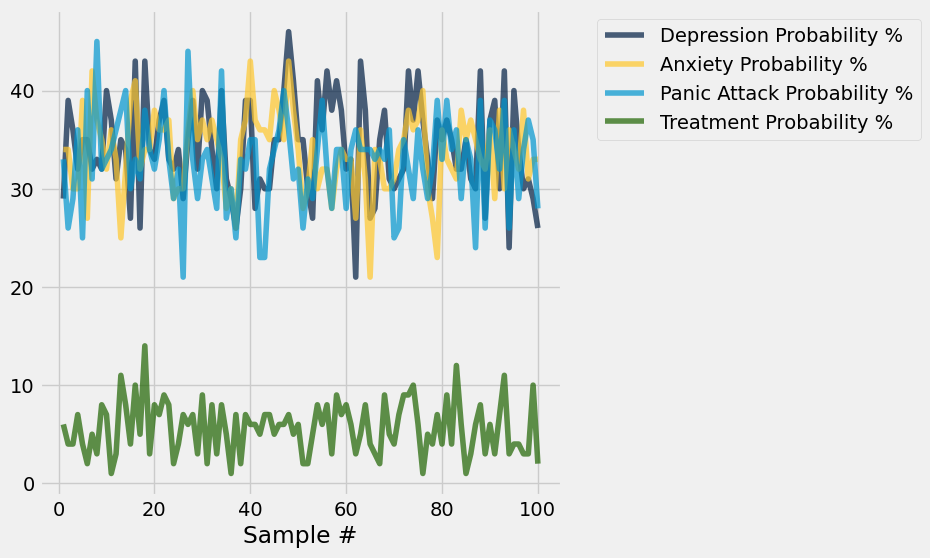

In [133]:
sample_table_all.plot("Sample #")